In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv
/kaggle/input/stocknews/RedditNews.csv


In [2]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go
import plotly.express as px
from sklearn import svm
from sklearn.svm import SVC
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array
from sklearn.metrics import precision_score, recall_score, f1_score
import time
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [3]:
df1 = pd.read_csv('../input/stocknews/upload_DJIA_table.csv')
df1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
df2 = pd.read_csv('../input/stocknews/RedditNews.csv')
df2.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [5]:
# imported the file which contains top 25 headlines, stock went up or down(label) and date
df = pd.read_csv('../input/stocknews/Combined_News_DJIA.csv')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [6]:
df.isnull().sum()


Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

There are null values in top 23,24,25 headlines. We need to clean the data. We can do it by filling the values with median values.

In [7]:
# filling the null values with median 

df['Top23'].fillna(df['Top23'].median,inplace=True)
df['Top24'].fillna(df['Top24'].median,inplace=True)
df['Top25'].fillna(df['Top25'].median,inplace=True)

In [8]:
# seperating the data into train and test

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [9]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

Separating the data into train and test set. 2008-08-08 to 2014-12-31 as training set. And test set as 2015-01-02 to 206-07-01. This is roughly 80%-20% split.

In [10]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [11]:
train.shape

(1863, 27)

In [12]:
test.shape

(378, 27)

In [13]:
# removing punctuations and changing all the letters to lowercase for both train and test

all_data = [train,test]

for df in all_data:
    df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
    for i in df.columns:
        if i=='Date':
            continue
        if i=='Label':
            continue
        df[i] = df[i].str.lower()

train.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,,0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge
1,,1,b why wont america and nato help us if they w...,b bush puts foot down on georgian conflict,b jewish georgian minister thanks to israeli ...,b georgian army flees in disarray as russians ...,b olympic opening ceremony fireworks faked,b what were the mossad with fraudulent new zea...,b russia angered by israeli military sale to g...,b an american citizen living in s ossetia blam...,...,b israel and the us behind the georgian aggres...,b do not believe tv neither russian nor geor...,b riots are still going on in montreal canada...,b china to overtake us as largest manufacturer,b war in south ossetia pics,b israeli physicians group condemns state tort...,b russia has just beaten the united states ov...,b perhaps the question about the georgia r...,b russia is so much better at war,b so this is what it s come to trading sex fo...
2,,0,b remember that adorable year old who sang a...,b russia ends georgia operation,b if we had no sexual harassment we would hav...,b al qa eda is losing support in iraq because ...,b ceasefire in georgia putin outmaneuvers the...,b why microsoft and intel tried to kill the xo...,b stratfor the russo georgian war and the bal...,b i m trying to get a sense of this whole geor...,...,b u s troops still in georgia did you know t...,b why russias response to georgia was right,b gorbachev accuses u s of making a serious ...,b russia georgia and nato cold war two,b remember that adorable year old who led y...,b war in georgia the israeli connection,b all signs point to the us encouraging georgi...,b christopher king argues that the us and nato...,b america the new mexico,b bbc news asia pacific extinction by man...
3,,0,b u s refuses israel weapons to attack iran ...,b when the president ordered to attack tskhinv...,b israel clears troops who killed reuters cam...,b britain s policy of being tough on drugs is...,b body of year old found in trunk latest ...,b china has moved million quake survivors...,b bush announces operation get all up in russi...,b russian forces sink georgian ships,...,b elephants extinct by,b us humanitarian missions soon in georgia i...,b georgia s ddos came from us sources,b russian convoy heads into georgia violating...,b israeli defence minister us against strike ...,b gorbachev we had no choice,b witness russian forces head towards tbilisi...,b quarter of russians blame u s for conflict...,b georgian president says us military will ta...,b nobel laureate aleksander solzhenitsyn...
4,,1,b all the experts admit that we should legalis...,b war in south osetia pictures made by a ...,b swedish wrestler ara abrahamian throws away ...,b russia exaggerated the death toll in south o...,b missile that killed inside pakistan may ha...,b rushdie condemns random house s refusal to p...,b poland and us agree to missle defense deal ...,b will the russians conquer tblisi bet on it ...,...,b bank analyst forecast georgian crisis days...,b georgia confict could set back russia s us r...,b war in the caucasus is as much the product o...,b non media photos of s

In [14]:
# combining all the headlines in train data into one and appending them into a list 

headlines = []
for row in range(0,len(train.index)):
    headlines.append(' '.join(str(x) for x in train.iloc[row,2:]))
headlines[0]

'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [15]:
# combining all the headlines in test data into one and appending them into a list 

test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

# Random forest

In [16]:
max_features_num = [500,1000,3000]
ngram = [1,2,3,4,5]
accRF = []
timeRF = []
T = 0
for i in max_features_num:
    for j in ngram:
        start_time = time.time()
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)

        RF = RandomForestClassifier(n_estimators=200, criterion='entropy')
        RF.fit(traindataset,train['Label'])
        predictions = RF.predict(test_dataset)
        
        acc=accuracy_score(test['Label'],predictions)
        accRF.append(acc)
        print('Accuracy: %.3f' % acc)
        
        precision = precision_score(test["Label"], predictions, average='binary')
        print('Precision: %.3f' % precision)
        
        recall = recall_score(test["Label"], predictions, average='binary')
        print('Recall: %.3f' % recall)
        
        score = f1_score(test["Label"], predictions, average='binary')
        print('F1-Score: %.3f' % score)
        
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print (classification_report(test["Label"], predictions))
       
        
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        
        
        print("--- %s seconds ---" % (time.time() - start_time))
        
        T = time.time() - start_time
        timeRF.append(T)
        print('==========================================================================')
        print('==========================================================================')

Accuracy: 0.839
Precision: 0.799
Recall: 0.911
F1-Score: 0.852
max number of features used : 500
ngram_range (1,1)
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       186
           1       0.80      0.91      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378

confusion matrix : [[142  44]
 [ 17 175]]
--- 6.412210941314697 seconds ---
Accuracy: 0.854
Precision: 0.825
Recall: 0.906
F1-Score: 0.864
max number of features used : 500
ngram_range (2,2)
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       186
           1       0.82      0.91      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378

confusion matrix : [[149  37]
 [ 18 174]

Accuracy: 0.854
Precision: 0.816
Recall: 0.922
F1-Score: 0.866
max number of features used : 3000
ngram_range (4,4)
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       186
           1       0.82      0.92      0.87       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378

confusion matrix : [[146  40]
 [ 15 177]]
--- 8.290827989578247 seconds ---
Accuracy: 0.796
Precision: 0.747
Recall: 0.906
F1-Score: 0.819
max number of features used : 3000
ngram_range (5,5)
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       186
           1       0.75      0.91      0.82       192

    accuracy                           0.80       378
   macro avg       0.81      0.79      0.79       378
weighted avg       0.81      0.80      0.79       378

confusion matrix : [[127  59]
 [ 18 17

In [17]:
timeRF

[6.412256479263306,
 5.920471906661987,
 6.883655071258545,
 8.310741662979126,
 7.475931644439697,
 6.228800535202026,
 6.116100549697876,
 6.597879409790039,
 7.751594066619873,
 7.186203718185425,
 6.1187684535980225,
 5.997309446334839,
 8.0527184009552,
 8.290871143341064,
 8.171597003936768]

In [18]:
accRF

[0.8386243386243386,
 0.8544973544973545,
 0.8597883597883598,
 0.8015873015873016,
 0.6375661375661376,
 0.8412698412698413,
 0.8412698412698413,
 0.873015873015873,
 0.8095238095238095,
 0.7195767195767195,
 0.8544973544973545,
 0.8333333333333334,
 0.8783068783068783,
 0.8544973544973545,
 0.7962962962962963]

# XGBoost

In [19]:
max_features_num = [500,1000,3000]
ngram = [1,2,3,4,5]
accXG = []
timeXG = []
T = 0
for i in max_features_num:
    for j in ngram:
        start_time = time.time()
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)

        xgb = XGBClassifier(random_state =1)
        xgb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),train['Label'])
        predictions = xgb.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))
        
        
        acc=accuracy_score(test['Label'],predictions)
        accXG.append(acc)
        print('Accuracy: %.3f' % acc)
        
        precision = precision_score(test["Label"], predictions, average='binary')
        print('Precision: %.3f' % precision)
        
        recall = recall_score(test["Label"], predictions, average='binary')
        print('Recall: %.3f' % recall)
        
        score = f1_score(test["Label"], predictions, average='binary')
        print('F1-Score: %.3f' % score)
        
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print (classification_report(test["Label"], predictions))
       
        
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        
        
        print("--- %s seconds ---" % (time.time() - start_time))
        T = time.time() - start_time
        timeXG.append(T)
        print('==========================================================================')
        print('==========================================================================')

Accuracy: 0.844
Precision: 0.845
Recall: 0.849
F1-Score: 0.847
max number of features used : 500
ngram_range (1,1)
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       186
           1       0.84      0.85      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378

confusion matrix : [[156  30]
 [ 29 163]]
--- 4.167260646820068 seconds ---
Accuracy: 0.844
Precision: 0.821
Recall: 0.885
F1-Score: 0.852
max number of features used : 500
ngram_range (2,2)
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       186
           1       0.82      0.89      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378

confusion matrix : [[149  37]
 [ 22 170]

Accuracy: 0.667
Precision: 0.621
Recall: 0.880
F1-Score: 0.728
max number of features used : 3000
ngram_range (4,4)
              precision    recall  f1-score   support

           0       0.78      0.45      0.57       186
           1       0.62      0.88      0.73       192

    accuracy                           0.67       378
   macro avg       0.70      0.66      0.65       378
weighted avg       0.70      0.67      0.65       378

confusion matrix : [[ 83 103]
 [ 23 169]]
--- 23.932562112808228 seconds ---
Accuracy: 0.550
Precision: 0.533
Recall: 0.922
F1-Score: 0.676
max number of features used : 3000
ngram_range (5,5)
              precision    recall  f1-score   support

           0       0.67      0.17      0.27       186
           1       0.53      0.92      0.68       192

    accuracy                           0.55       378
   macro avg       0.60      0.54      0.47       378
weighted avg       0.60      0.55      0.47       378

confusion matrix : [[ 31 155]
 [ 15 1

In [20]:
timeXG

[4.1674113273620605,
 6.411201000213623,
 7.2219078540802,
 8.304632186889648,
 8.028504610061646,
 8.287952661514282,
 9.390459775924683,
 10.298734426498413,
 10.410127878189087,
 10.470978260040283,
 21.234405517578125,
 21.61648654937744,
 21.46885633468628,
 23.932716846466064,
 22.554662466049194]

In [21]:
accXG

[0.843915343915344,
 0.843915343915344,
 0.753968253968254,
 0.6349206349206349,
 0.5502645502645502,
 0.8571428571428571,
 0.8518518518518519,
 0.7486772486772487,
 0.6666666666666666,
 0.5502645502645502,
 0.828042328042328,
 0.8412698412698413,
 0.791005291005291,
 0.6666666666666666,
 0.5502645502645502]

# Logistic regression

In [22]:
max_features_num = [500,1000,3000]
ngram = [1,2,3,4,5]
accLR = []
timeLR = []
T = 0
for i in max_features_num:
    for j in ngram:
        start_time = time.time()
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)

        LR = LogisticRegression()
        LR.fit(traindataset,train['Label'])
        predictions = LR.predict(test_dataset)
        
        acc=accuracy_score(test['Label'],predictions)
        accLR.append(acc)
        print('Accuracy: %.3f' % acc)
        
        precision = precision_score(test["Label"], predictions, average='binary')
        print('Precision: %.3f' % precision)
        
        recall = recall_score(test["Label"], predictions, average='binary')
        print('Recall: %.3f' % recall)
        
        score = f1_score(test["Label"], predictions, average='binary')
        print('F1-Score: %.3f' % score)
        
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print (classification_report(test["Label"], predictions))
       
        
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        
        
        print("--- %s seconds ---" % (time.time() - start_time))
        T = time.time() - start_time
        timeLR.append(T)
        print('==========================================================================')
        print('==========================================================================')

Accuracy: 0.646
Precision: 0.646
Recall: 0.667
F1-Score: 0.656
max number of features used : 500
ngram_range (1,1)
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       186
           1       0.65      0.67      0.66       192

    accuracy                           0.65       378
   macro avg       0.65      0.65      0.65       378
weighted avg       0.65      0.65      0.65       378

confusion matrix : [[116  70]
 [ 64 128]]
--- 1.5384352207183838 seconds ---
Accuracy: 0.690
Precision: 0.683
Recall: 0.729
F1-Score: 0.705
max number of features used : 500
ngram_range (2,2)
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       186
           1       0.68      0.73      0.71       192

    accuracy                           0.69       378
   macro avg       0.69      0.69      0.69       378
weighted avg       0.69      0.69      0.69       378

confusion matrix : [[121  65]
 [ 52 140

Accuracy: 0.825
Precision: 0.812
Recall: 0.854
F1-Score: 0.832
max number of features used : 3000
ngram_range (4,4)
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       186
           1       0.81      0.85      0.83       192

    accuracy                           0.83       378
   macro avg       0.83      0.82      0.83       378
weighted avg       0.83      0.83      0.83       378

confusion matrix : [[148  38]
 [ 28 164]]
--- 4.8092875480651855 seconds ---
Accuracy: 0.775
Precision: 0.722
Recall: 0.906
F1-Score: 0.804
max number of features used : 3000
ngram_range (5,5)
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       186
           1       0.72      0.91      0.80       192

    accuracy                           0.78       378
   macro avg       0.80      0.77      0.77       378
weighted avg       0.79      0.78      0.77       378

confusion matrix : [[119  67]
 [ 18 1

In [23]:
timeLR

[1.53847074508667,
 3.430708408355713,
 4.370587348937988,
 5.049689531326294,
 5.194726467132568,
 1.6013848781585693,
 4.620759963989258,
 4.509601354598999,
 4.790530681610107,
 5.067986965179443,
 1.6976935863494873,
 3.3574130535125732,
 4.61380934715271,
 4.809327125549316,
 5.6019287109375]

In [24]:
accLR

[0.6455026455026455,
 0.6904761904761905,
 0.7037037037037037,
 0.6746031746031746,
 0.6058201058201058,
 0.7433862433862434,
 0.7698412698412699,
 0.7592592592592593,
 0.7116402116402116,
 0.6878306878306878,
 0.8201058201058201,
 0.8412698412698413,
 0.8650793650793651,
 0.8253968253968254,
 0.7751322751322751]

# SVM Gaussian

In [25]:
max_features_num = [500,1000,3000]
ngram = [1,2,3,4,5]
accSVM1 = []
timeSVM1 = []
T = 0
for i in max_features_num:
    for j in ngram:
        start_time = time.time()
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)

        SVM1 = svm.SVC(C=1, class_weight='balanced',kernel='rbf', gamma=0.100000000000000000000001, tol=1e-10)
        SVM1.fit(traindataset,train['Label'])
        predictions = SVM1.predict(test_dataset)
        
        acc=accuracy_score(test['Label'],predictions)
        accSVM1.append(acc)
        print('Accuracy: %.3f' % acc)
        
        precision = precision_score(test["Label"], predictions, average='binary')
        print('Precision: %.3f' % precision)
        
        recall = recall_score(test["Label"], predictions, average='binary')
        print('Recall: %.3f' % recall)
        
        score = f1_score(test["Label"], predictions, average='binary')
        print('F1-Score: %.3f' % score)
        
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print (classification_report(test["Label"], predictions))
       
        
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        
        
        print("--- %s seconds ---" % (time.time() - start_time))
        T = time.time() - start_time
        timeSVM1.append(T)
        print('==========================================================================')
        print('==========================================================================')

Accuracy: 0.852
Precision: 0.774
Recall: 1.000
F1-Score: 0.873
max number of features used : 500
ngram_range (1,1)
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378

confusion matrix : [[130  56]
 [  0 192]]
--- 6.642781019210815 seconds ---
Accuracy: 0.857
Precision: 0.783
Recall: 0.995
F1-Score: 0.876
max number of features used : 500
ngram_range (2,2)
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       186
           1       0.78      0.99      0.88       192

    accuracy                           0.86       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.86      0.85       378

confusion matrix : [[133  53]
 [  1 191]

Accuracy: 0.817
Precision: 0.860
Recall: 0.766
F1-Score: 0.810
max number of features used : 3000
ngram_range (4,4)
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       186
           1       0.86      0.77      0.81       192

    accuracy                           0.82       378
   macro avg       0.82      0.82      0.82       378
weighted avg       0.82      0.82      0.82       378

confusion matrix : [[162  24]
 [ 45 147]]
--- 5.918213367462158 seconds ---
Accuracy: 0.762
Precision: 0.713
Recall: 0.891
F1-Score: 0.792
max number of features used : 3000
ngram_range (5,5)
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       186
           1       0.71      0.89      0.79       192

    accuracy                           0.76       378
   macro avg       0.78      0.76      0.76       378
weighted avg       0.78      0.76      0.76       378

confusion matrix : [[117  69]
 [ 21 17

In [26]:
timeSVM1

[6.642816543579102,
 4.953297853469849,
 4.7845189571380615,
 5.2826454639434814,
 5.752271413803101,
 8.988153219223022,
 5.601014852523804,
 4.9220521450042725,
 5.096294164657593,
 5.132066249847412,
 11.335211753845215,
 6.935970067977905,
 5.505012273788452,
 5.918375730514526,
 5.445751190185547]

In [27]:
accSVM1

[0.8518518518518519,
 0.8571428571428571,
 0.8201058201058201,
 0.6984126984126984,
 0.5740740740740741,
 0.8518518518518519,
 0.8518518518518519,
 0.8465608465608465,
 0.7433862433862434,
 0.6243386243386243,
 0.8518518518518519,
 0.8518518518518519,
 0.8465608465608465,
 0.8174603174603174,
 0.7619047619047619]

# SVM Linear

In [28]:
max_features_num = [500,1000,3000]
ngram = [1,2,3,4,5]
accSVM2=[]
timeSVM2 = []
T = 0
for i in max_features_num:
    for j in ngram:
        start_time = time.time()
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)

        SVM2 = svm.LinearSVC(C=0.1, class_weight='balanced')
        SVM2.fit(traindataset,train['Label'])
        predictions = SVM2.predict(test_dataset)
        
        
        acc=accuracy_score(test['Label'],predictions)
        accSVM2.append(acc)
        print('Accuracy: %.3f' % acc)
        
        precision = precision_score(test["Label"], predictions, average='binary')
        print('Precision: %.3f' % precision)
        
        recall = recall_score(test["Label"], predictions, average='binary')
        print('Recall: %.3f' % recall)
        
        score = f1_score(test["Label"], predictions, average='binary')
        print('F1-Score: %.3f' % score)
        
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print (classification_report(test["Label"], predictions))
       
        
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        
        
        print("--- %s seconds ---" % (time.time() - start_time))
        T = time.time() - start_time
        timeSVM2.append(T)
        print('==========================================================================')
        print('==========================================================================')

Accuracy: 0.646
Precision: 0.661
Recall: 0.620
F1-Score: 0.640
max number of features used : 500
ngram_range (1,1)
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       186
           1       0.66      0.62      0.64       192

    accuracy                           0.65       378
   macro avg       0.65      0.65      0.65       378
weighted avg       0.65      0.65      0.65       378

confusion matrix : [[125  61]
 [ 73 119]]
--- 2.4330623149871826 seconds ---
Accuracy: 0.672
Precision: 0.683
Recall: 0.661
F1-Score: 0.672
max number of features used : 500
ngram_range (2,2)
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       186
           1       0.68      0.66      0.67       192

    accuracy                           0.67       378
   macro avg       0.67      0.67      0.67       378
weighted avg       0.67      0.67      0.67       378

confusion matrix : [[127  59]
 [ 65 127

Accuracy: 0.810
Precision: 0.816
Recall: 0.807
F1-Score: 0.812
max number of features used : 3000
ngram_range (4,4)
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       186
           1       0.82      0.81      0.81       192

    accuracy                           0.81       378
   macro avg       0.81      0.81      0.81       378
weighted avg       0.81      0.81      0.81       378

confusion matrix : [[151  35]
 [ 37 155]]
--- 5.1259846687316895 seconds ---
Accuracy: 0.775
Precision: 0.734
Recall: 0.875
F1-Score: 0.798
max number of features used : 3000
ngram_range (5,5)
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       186
           1       0.73      0.88      0.80       192

    accuracy                           0.78       378
   macro avg       0.79      0.77      0.77       378
weighted avg       0.79      0.78      0.77       378

confusion matrix : [[125  61]
 [ 24 1

In [29]:
timeSVM2

[2.4331042766571045,
 3.385342836380005,
 4.261343717575073,
 5.446606874465942,
 4.9650139808654785,
 2.5223793983459473,
 3.46085786819458,
 4.515882968902588,
 4.712031602859497,
 5.141366720199585,
 2.932464599609375,
 3.4147229194641113,
 4.996578216552734,
 5.126016616821289,
 5.277709007263184]

In [30]:
accSVM2

[0.6455026455026455,
 0.671957671957672,
 0.708994708994709,
 0.6931216931216931,
 0.6111111111111112,
 0.7248677248677249,
 0.7592592592592593,
 0.7380952380952381,
 0.7407407407407407,
 0.6693121693121693,
 0.8174603174603174,
 0.8492063492063492,
 0.8571428571428571,
 0.8095238095238095,
 0.7751322751322751]

# Gradient Boosting

In [31]:
max_features_num = [500,1000,3000]
ngram = [1,2,3,4,5]
accGB = []
timeGB = []
T = 0
for i in max_features_num:
    for j in ngram:
        start_time = time.time()
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)

        GB = GradientBoostingClassifier(random_state=0)
        GB.fit(traindataset,train['Label'])
        predictions = GB.predict(test_dataset)
        
        
        acc=accuracy_score(test['Label'],predictions)
        accGB.append(acc)
        print('Accuracy: %.3f' % acc)
        
        precision = precision_score(test["Label"], predictions, average='binary')
        print('Precision: %.3f' % precision)
        
        recall = recall_score(test["Label"], predictions, average='binary')
        print('Recall: %.3f' % recall)
        
        score = f1_score(test["Label"], predictions, average='binary')
        print('F1-Score: %.3f' % score)
        
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print (classification_report(test["Label"], predictions))
       
        
        matrix=confusion_matrix(test['Label'],predictions)
        print('confusion matrix : {}'.format(matrix))
        
        
        print("--- %s seconds ---" % (time.time() - start_time))
        T = time.time() - start_time
        timeGB.append(T)
        print('==========================================================================')
        print('==========================================================================')

Accuracy: 0.767
Precision: 0.722
Recall: 0.880
F1-Score: 0.793
max number of features used : 500
ngram_range (1,1)
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       186
           1       0.72      0.88      0.79       192

    accuracy                           0.77       378
   macro avg       0.78      0.77      0.76       378
weighted avg       0.78      0.77      0.76       378

confusion matrix : [[121  65]
 [ 23 169]]
--- 3.970515489578247 seconds ---
Accuracy: 0.714
Precision: 0.665
Recall: 0.880
F1-Score: 0.758
max number of features used : 500
ngram_range (2,2)
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       186
           1       0.67      0.88      0.76       192

    accuracy                           0.71       378
   macro avg       0.74      0.71      0.70       378
weighted avg       0.74      0.71      0.71       378

confusion matrix : [[101  85]
 [ 23 169]

Accuracy: 0.685
Precision: 0.627
Recall: 0.938
F1-Score: 0.752
max number of features used : 3000
ngram_range (4,4)
              precision    recall  f1-score   support

           0       0.87      0.42      0.57       186
           1       0.63      0.94      0.75       192

    accuracy                           0.69       378
   macro avg       0.75      0.68      0.66       378
weighted avg       0.75      0.69      0.66       378

confusion matrix : [[ 79 107]
 [ 12 180]]
--- 5.764068841934204 seconds ---
Accuracy: 0.677
Precision: 0.616
Recall: 0.969
F1-Score: 0.753
max number of features used : 3000
ngram_range (5,5)
              precision    recall  f1-score   support

           0       0.92      0.38      0.53       186
           1       0.62      0.97      0.75       192

    accuracy                           0.68       378
   macro avg       0.77      0.67      0.64       378
weighted avg       0.77      0.68      0.65       378

confusion matrix : [[ 70 116]
 [  6 18

In [32]:
timeGB

[3.970543622970581,
 4.151768922805786,
 4.588473081588745,
 4.886287689208984,
 5.1459386348724365,
 4.5953590869903564,
 4.550513029098511,
 4.633326530456543,
 5.131822347640991,
 4.884997129440308,
 6.593981504440308,
 5.278387546539307,
 5.4241979122161865,
 5.764100790023804,
 5.283147573471069]

In [33]:
accGB

[0.7671957671957672,
 0.7142857142857143,
 0.6798941798941799,
 0.6137566137566137,
 0.5661375661375662,
 0.7407407407407407,
 0.7354497354497355,
 0.6904761904761905,
 0.6349206349206349,
 0.5952380952380952,
 0.7804232804232805,
 0.7962962962962963,
 0.7328042328042328,
 0.6851851851851852,
 0.6772486772486772]

# LSTM

In [34]:
from keras.layers import Dropout
from keras import applications
from keras.layers import Dense, GlobalAveragePooling2D, merge, Input, concatenate
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.preprocessing.text import Tokenizer
from keras.layers import Flatten, LSTM, GRU, SpatialDropout1D
from keras.layers import Input
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.layers.merge import concatenate
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input, LSTM, Embedding, BatchNormalization, MaxPooling1D, concatenate, Dense


In [35]:
max_features_num = [500,1000,2000]
ngram = [1,2,3,4,5]
accLSTM = []
timeLSTM = []
T = 0
for i in max_features_num:
    for j in ngram:
        
        start_time = time.time()
        
        countvector=CountVectorizer(ngram_range=(j,j),max_features = i)
        df_3 = countvector.fit_transform(headlines)
        test_dataset = countvector.transform(test_transform)
        
        y_train = train['Label']
        y_train = tf.keras.utils.to_categorical(y_train, 2)
        y_test = test['Label']
        y_test = tf.keras.utils.to_categorical(y_test, 2)
        
        #LSTM Model
        mlp_model1=Input(shape=(df_3.shape[1],))
        b1 = Embedding(input_dim=500, output_dim=128, input_length=100)(mlp_model1)
        
        df_3 = df_3.toarray()
        test_dataset = test_dataset.toarray()

        all_inp = b1
        all_inp = SpatialDropout1D(0.2)(all_inp)
        all_inp = LSTM(196)(all_inp)

        p=Dense(2,activation='softmax')(all_inp)

        
        full_model = Model(inputs=[mlp_model1], outputs=p)
        full_model.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

        full_model.fit([df_3], y_train,
                                 epochs=10, batch_size=10,
                                 verbose=1, validation_split=0.4, shuffle = True)

        _,acc = full_model.evaluate(test_dataset, y_test, verbose = 2, batch_size = 10)
        y_pred = full_model.predict(test_dataset)
        y_pred = np.argmax(y_pred, axis=1)
        y_test = np.argmax(y_test, axis=1)
        
        print("Accuracy: %.2f" % (acc))
        accLSTM.append(acc)
        
        precision = precision_score(y_test, y_pred, average='binary')
        print('Precision: %.3f' % precision)
        
        recall = recall_score(y_test, y_pred, average='binary')
        print('Recall: %.3f' % recall)
        
        score = f1_score(y_test, y_pred, average='binary')
        print('F1-Score: %.3f' % score)
        
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print (classification_report(y_test, y_pred))
       
       
        print("--- %s seconds ---" % (time.time() - start_time))
        T = time.time() - start_time
        timeLSTM.append(T)
        print('==========================================================================')
        print('==========================================================================')






Epoch 1/10
112/112 [==============================] - 4s 37ms/step - loss: 0.6932 - accuracy: 0.5282 - val_loss: 0.6923 - val_accuracy: 0.5201
Epoch 2/10
112/112 [==============================] - 4s 32ms/step - loss: 0.6935 - accuracy: 0.5327 - val_loss: 0.6917 - val_accuracy: 0.5335
Epoch 3/10
112/112 [==============================] - 4s 34ms/step - loss: 0.6927 - accuracy: 0.5291 - val_loss: 0.6922 - val_accuracy: 0.5268
Epoch 4/10
112/112 [==============================] - 4s 34ms/step - loss: 0.6930 - accuracy: 0.5282 - val_loss: 0.6902 - val_accuracy: 0.5362
Epoch 5/10
112/112 [==============================] - 4s 32ms/step - loss: 0.6913 - accuracy: 0.5318 - val_loss: 0.6901 - val_accuracy: 0.5362
Epoch 6/10
112/112 [==============================] - 4s 34ms/step - loss: 0.6918 - accuracy: 0.5300 - val_loss: 0.6899 - val_accuracy: 0.5362
Epoch 7/10
112/112 [==============================] - 4s 33ms/step - loss: 0.6989 - accuracy: 0.5121 - val_loss: 0.6911 - val_accuracy: 0.5349

Epoch 1/10
112/112 [==============================] - 4s 36ms/step - loss: 0.6932 - accuracy: 0.5192 - val_loss: 0.6908 - val_accuracy: 0.5362
Epoch 2/10
112/112 [==============================] - 4s 33ms/step - loss: 0.6933 - accuracy: 0.5166 - val_loss: 0.6908 - val_accuracy: 0.5362
Epoch 3/10
112/112 [==============================] - 4s 31ms/step - loss: 0.6921 - accuracy: 0.5237 - val_loss: 0.6917 - val_accuracy: 0.5349
Epoch 4/10
112/112 [==============================] - 4s 31ms/step - loss: 0.6923 - accuracy: 0.5336 - val_loss: 0.6908 - val_accuracy: 0.5362
Epoch 5/10
112/112 [==============================] - 4s 32ms/step - loss: 0.6918 - accuracy: 0.5327 - val_loss: 0.6911 - val_accuracy: 0.5349
Epoch 6/10
112/112 [==============================] - 4s 34ms/step - loss: 0.6916 - accuracy: 0.5336 - val_loss: 0.6906 - val_accuracy: 0.5362
Epoch 7/10
112/112 [==============================] - 4s 32ms/step - loss: 0.6914 - accuracy: 0.5264 - val_loss: 0.6923 - val_accuracy: 0.5362

Epoch 1/10
112/112 [==============================] - 7s 62ms/step - loss: 0.6943 - accuracy: 0.5300 - val_loss: 0.6916 - val_accuracy: 0.5362
Epoch 2/10
112/112 [==============================] - 6s 57ms/step - loss: 0.6930 - accuracy: 0.5184 - val_loss: 0.6914 - val_accuracy: 0.5335
Epoch 3/10
112/112 [==============================] - 6s 57ms/step - loss: 0.6915 - accuracy: 0.5336 - val_loss: 0.6916 - val_accuracy: 0.5362
Epoch 4/10
112/112 [==============================] - 6s 56ms/step - loss: 0.6938 - accuracy: 0.5300 - val_loss: 0.6906 - val_accuracy: 0.5362
Epoch 5/10
112/112 [==============================] - 6s 57ms/step - loss: 0.6916 - accuracy: 0.5327 - val_loss: 0.6911 - val_accuracy: 0.5335
Epoch 6/10
112/112 [==============================] - 6s 58ms/step - loss: 0.6916 - accuracy: 0.5336 - val_loss: 0.6909 - val_accuracy: 0.5362
Epoch 7/10
112/112 [==============================] - 6s 57ms/step - loss: 0.6919 - accuracy: 0.5345 - val_loss: 0.6908 - val_accuracy: 0.5335

Epoch 1/10
112/112 [==============================] - 13s 113ms/step - loss: 0.6950 - accuracy: 0.5049 - val_loss: 0.6911 - val_accuracy: 0.5362
Epoch 2/10
112/112 [==============================] - 12s 110ms/step - loss: 0.6926 - accuracy: 0.5282 - val_loss: 0.6909 - val_accuracy: 0.5362
Epoch 3/10
112/112 [==============================] - 12s 108ms/step - loss: 0.6927 - accuracy: 0.5318 - val_loss: 0.6912 - val_accuracy: 0.5362
Epoch 4/10
112/112 [==============================] - 12s 109ms/step - loss: 0.6921 - accuracy: 0.5318 - val_loss: 0.6910 - val_accuracy: 0.5362
Epoch 5/10
112/112 [==============================] - 12s 108ms/step - loss: 0.6914 - accuracy: 0.5327 - val_loss: 0.6910 - val_accuracy: 0.5349
Epoch 6/10
112/112 [==============================] - 12s 109ms/step - loss: 0.6915 - accuracy: 0.5327 - val_loss: 0.6907 - val_accuracy: 0.5349
Epoch 7/10
112/112 [==============================] - 12s 110ms/step - loss: 0.6927 - accuracy: 0.5309 - val_loss: 0.6911 - val_ac

In [36]:
timeLSTM

[49.87101340293884,
 43.66960573196411,
 45.196301221847534,
 45.130311012268066,
 46.17917013168335,
 70.48169994354248,
 71.81266260147095,
 73.42182731628418,
 74.07404971122742,
 73.8456711769104,
 129.87807869911194,
 131.0254602432251,
 132.0510561466217,
 133.3383333683014,
 133.37942957878113]

In [37]:
accLSTM

[0.5079365372657776,
 0.5185185074806213,
 0.523809552192688,
 0.5079365372657776,
 0.5079365372657776,
 0.5079365372657776,
 0.5079365372657776,
 0.5264550447463989,
 0.5052909851074219,
 0.5079365372657776,
 0.5105820298194885,
 0.5079365372657776,
 0.5026454925537109,
 0.5052909851074219,
 0.5079365372657776]

# Plotting Accuracies

In [38]:
x = [accLR,accSVM1,accSVM2,accRF,accXG,accGB,accLSTM]
maxAcc = []
minAcc = []
for i in x:
    k1 = max(i)
    maxAcc.append(k1)
    k2 = min(i)
    minAcc.append(k2)

In [39]:
maxAcc

[0.8650793650793651,
 0.8571428571428571,
 0.8571428571428571,
 0.8783068783068783,
 0.8571428571428571,
 0.7962962962962963,
 0.5264550447463989]

In [40]:
minAcc

[0.6058201058201058,
 0.5740740740740741,
 0.6111111111111112,
 0.6375661375661376,
 0.5502645502645502,
 0.5661375661375662,
 0.5026454925537109]

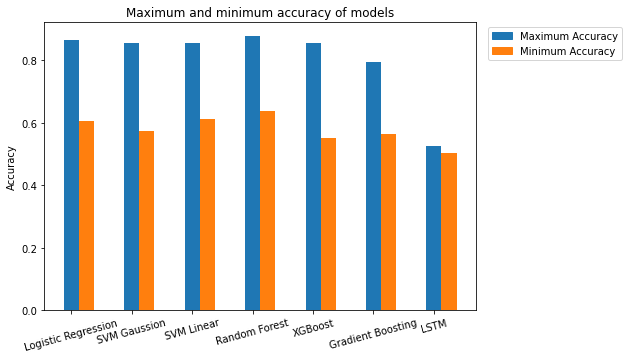

In [41]:
import numpy as np
import matplotlib.pyplot as plt
data = [maxAcc,minAcc]

labels = ['Logistic Regression', 'SVM Gaussion', 'SVM Linear', 'Random Forest', 'XGBoost','Gradient Boosting','LSTM']
X = np.arange(7)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'tab:orange', width = 0.25)


ax.set_ylabel('Accuracy')
ax.set_title('Maximum and minimum accuracy of models')
ax.set_xticks(X)
degrees = 15
plt.xticks(rotation=degrees)
ax.set_xticklabels(labels)


colors = {'Maximum Accuracy':'tab:blue', 'Minimum Accuracy':'tab:orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels,bbox_to_anchor=(1.35, 1),loc = 'upper right')


# Plotting execution time

In [42]:
x = [timeLR,timeSVM1,timeSVM2,timeRF,timeXG,timeGB,timeLSTM]
maxTime = []
minTime = []
for i in x:
    k1 = max(i)
    maxTime.append(k1)
    k2 = min(i)
    minTime.append(k2)

In [43]:
maxTime

[5.6019287109375,
 11.335211753845215,
 5.446606874465942,
 8.310741662979126,
 23.932716846466064,
 6.593981504440308,
 133.37942957878113]

In [44]:
minTime

[1.53847074508667,
 4.7845189571380615,
 2.4331042766571045,
 5.920471906661987,
 4.1674113273620605,
 3.970543622970581,
 43.66960573196411]

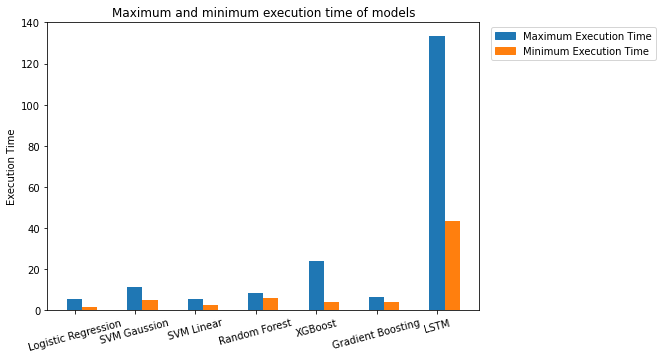

In [48]:
data = [maxTime,minTime]

labels = ['Logistic Regression', 'SVM Gaussion', 'SVM Linear', 'Random Forest', 'XGBoost','Gradient Boosting','LSTM']
X = np.arange(7)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'tab:orange', width = 0.25)


ax.set_ylabel('Execution Time')
ax.set_title('Maximum and minimum execution time of models')
ax.set_xticks(X)
degrees = 15
plt.xticks(rotation=degrees)
ax.set_xticklabels(labels)


colors = {'Maximum Execution Time':'tab:blue', 'Minimum Execution Time':'tab:orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels,bbox_to_anchor=(1.42, 1),loc = 'upper right')
